In [1]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LinearRegression()
>>> reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
LinearRegression()
>>> reg.coef_
array([0.5, 0.5])

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


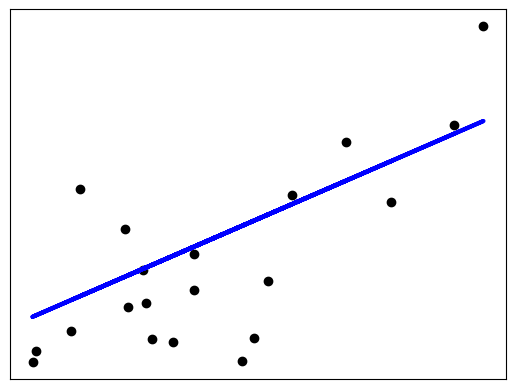

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your data into a DataFrame using pandas (assuming it's an Excel file)
data = pd.read_excel('bridges.xlsx')

# Handling missing values in 'value' column by filling NaNs with the mean
data['value'].fillna(data['value'].mean(), inplace=True)

# Assuming 'length' and 'width' are your features and 'value' is the target variable
X = data[['length', 'width']]
y = data['value']

# Train your model (assuming you have already split your data into training and testing sets)
model = LinearRegression()
model.fit(X, y)

# Taking user input for a new project
new_length = float(input("Enter the length of the new project: "))
new_width = float(input("Enter the width of the new project: "))

# Make a prediction using the trained model
new_project = pd.DataFrame({'length': [new_length], 'width': [new_width]})
predicted_value = model.predict(new_project)

# Display the predicted value for the new project
print(f"The estimated value for the new project is: {predicted_value[0]}")

The estimated value for the new project is: 147575504.90396237


In [16]:
import pandas as pd
from datetime import datetime

# Load your data into a DataFrame using pandas (assuming it's an Excel file)
data = pd.read_excel('bridges.xlsx')

# Convert 'Start Date' and 'Finish Date' columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['Finish Date'] = pd.to_datetime(data['Finish Date'])

# Calculate project durations
data['Project Duration'] = (data['Finish Date'] - data['Start Date']).dt.days

# Filter out projects with zero duration
valid_projects = data[data['Project Duration'] != 0]

# Calculate average project duration excluding zero duration projects
average_duration = valid_projects['Project Duration'].mean()

# Assuming inflation rate (you can replace this with actual inflation data)
inflation_rate_per_day = 0.001  # Just an example rate per day

# Calculate estimated inflation-adjusted value for the new project in 2024
# Assuming the new project starts in 2024 and completes within an average duration
new_project_duration = pd.to_datetime('2024-12-31') - pd.to_datetime('2024-01-01')
new_project_duration_days = new_project_duration.days

# Debugging: Print variables to check for potential issues
print(f"new_project_duration_days: {new_project_duration_days}")
print(f"average_duration: {average_duration}")

# Check for potential division by zero and adjust calculation
if new_project_duration_days != 0 and average_duration != 0:
    inflation_multiplier = (1 + (inflation_rate_per_day * new_project_duration_days)) ** (new_project_duration_days / average_duration)
    print(f"inflation_multiplier: {inflation_multiplier}")

    estimated_value = predicted_value[0] * inflation_multiplier if not pd.isna(inflation_multiplier) else float('nan')
    print(f"The estimated inflation-adjusted value for the new project in 2024 is: {estimated_value}")
else:
    print("Unable to estimate inflation-adjusted value due to zero duration values in valid projects.")


new_project_duration_days: 365
average_duration: nan
inflation_multiplier: nan
The estimated inflation-adjusted value for the new project in 2024 is: nan


In [18]:
import pandas as pd
from datetime import datetime

# Load your data into a DataFrame using pandas (assuming it's an Excel file)
data = pd.read_excel('bridges.xlsx')

# Convert 'Start Date' and 'Finish Date' columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['Finish Date'] = pd.to_datetime(data['Finish Date'])

# Calculate project durations
data['Project Duration'] = (data['Finish Date'] - data['Start Date']).dt.days

# Check for missing or zero duration values
missing_duration_projects = data[data['Project Duration'].isnull() | (data['Project Duration'] == 0)]

if not missing_duration_projects.empty:
    print("Projects with missing or zero duration values:")
    print(missing_duration_projects)
else:
    # Filter out projects with zero duration
    valid_projects = data[data['Project Duration'] != 0]

    # Calculate average project duration excluding zero duration projects
    average_duration = valid_projects['Project Duration'].mean()

    # Assuming inflation rate (you can replace this with actual inflation data)
    inflation_rate_per_day = 0.001  # Just an example rate per day

    # Calculate estimated inflation-adjusted value for the new project in 2024
    # Assuming the new project starts in 2024 and completes within an average duration
    new_project_duration = pd.to_datetime('2024-12-31') - pd.to_datetime('2024-01-01')
    new_project_duration_days = new_project_duration.days

    # Check for potential division by zero and adjust calculation
    if new_project_duration_days != 0 and not pd.isna(average_duration) and average_duration != 0:
        inflation_multiplier = (1 + (inflation_rate_per_day * new_project_duration_days)) ** (new_project_duration_days / average_duration)
        estimated_value = predicted_value[0] * inflation_multiplier if not pd.isna(inflation_multiplier) else float('nan')
        print(f"The estimated inflation-adjusted value for the new project in 2024 is: {estimated_value}")
    else:
        print("Unable to estimate inflation-adjusted value due to missing or zero duration values in valid projects.")


Projects with missing or zero duration values:
                    Project  Location  Duration (Months)  \
0       0109\nSafeer Bridge     Cairo           4.966667   
1     0121\nEl Hegaz Bridge     Cairo           3.933333   
2        0128\nAbbas Bridge     Cairo           3.900000   
3     0129\nEl Asher Bridge     Cairo           3.966667   
4        0135\nHassan Mamon     Cairo           5.000000   
5   Total Nasr City Bridges     Cairo          16.166667   
6      0131\nEl Shorouk LRT     Cairo           7.000000   
7          0130\nKafr Shokr  Alyobyah          27.333333   
8          0166\nEl Alameen     Sahel          10.066667   
9        0122\nRR Maryotyah      Giza          48.633333   
10            0132\nRR Marg     Cairo          20.200000   
11          Total Ring Road      Giza          48.633333   
12    0143\nKhatatba Bridge  Menofyah          29.366667   
13      0152\nSokhna Bridge    Sokhna          28.333333   
14         0157\nAbo Ghaleb      Giza          38.500

In [19]:
import pandas as pd
from datetime import datetime

# Load your data into a DataFrame using pandas (assuming it's an Excel file)
data = pd.read_excel('bridges.xlsx')

# Convert 'Start Date' and 'Finish Date' columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['Finish Date'] = pd.to_datetime(data['Finish Date'])

# Calculate project duration in months
data['Duration'] = (data['Finish Date'] - data['Start Date']) // pd.Timedelta(days=30)  # Assuming 30 days in a month

# Display the updated DataFrame with the 'Duration' column
print(data)


                    Project  Location  Duration (Months)  \
0       0109\nSafeer Bridge     Cairo           4.966667   
1     0121\nEl Hegaz Bridge     Cairo           3.933333   
2        0128\nAbbas Bridge     Cairo           3.900000   
3     0129\nEl Asher Bridge     Cairo           3.966667   
4        0135\nHassan Mamon     Cairo           5.000000   
5   Total Nasr City Bridges     Cairo          16.166667   
6      0131\nEl Shorouk LRT     Cairo           7.000000   
7          0130\nKafr Shokr  Alyobyah          27.333333   
8          0166\nEl Alameen     Sahel          10.066667   
9        0122\nRR Maryotyah      Giza          48.633333   
10            0132\nRR Marg     Cairo          20.200000   
11          Total Ring Road      Giza          48.633333   
12    0143\nKhatatba Bridge  Menofyah          29.366667   
13      0152\nSokhna Bridge    Sokhna          28.333333   
14         0157\nAbo Ghaleb      Giza          38.500000   
15     0167\nWady El Natron    Behera   

In [20]:
data['Duration'] = data['duration'].round()
print(data)

                    Project  Location  Duration (Months)  \
0       0109\nSafeer Bridge     Cairo           4.966667   
1     0121\nEl Hegaz Bridge     Cairo           3.933333   
2        0128\nAbbas Bridge     Cairo           3.900000   
3     0129\nEl Asher Bridge     Cairo           3.966667   
4        0135\nHassan Mamon     Cairo           5.000000   
5   Total Nasr City Bridges     Cairo          16.166667   
6      0131\nEl Shorouk LRT     Cairo           7.000000   
7          0130\nKafr Shokr  Alyobyah          27.333333   
8          0166\nEl Alameen     Sahel          10.066667   
9        0122\nRR Maryotyah      Giza          48.633333   
10            0132\nRR Marg     Cairo          20.200000   
11          Total Ring Road      Giza          48.633333   
12    0143\nKhatatba Bridge  Menofyah          29.366667   
13      0152\nSokhna Bridge    Sokhna          28.333333   
14         0157\nAbo Ghaleb      Giza          38.500000   
15     0167\nWady El Natron    Behera   

Inflation=( 
CPI 
Start
​
 
CPI 
End
​
 −CPI 
Start
​
 
​
 )×100
Where:

CPI_End is the Consumer Price Index at the end of the period.
CPI_Start is the Consumer Price Index at the start of the period.

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your data into a DataFrame using pandas (assuming it's an Excel file)
data = pd.read_excel('bridges.xlsx')

# Handling missing values in 'value' column by filling NaNs with the mean
data['value'].fillna(data['value'].mean(), inplace=True)

# Assuming 'length', 'width', and 'duration' are your features and 'value' is the target variable
X = data[['length', 'width', 'duration']]
y = data['value']

# Train your model (assuming you have already split your data into training and testing sets)
model = LinearRegression()
model.fit(X, y)

# Taking user input for a new project
new_length = float(input("Enter the length of the new project: "))
new_width = float(input("Enter the width of the new project: "))
new_duration = round(float(input("Enter the duration of the new project in months: ")), 2)  # Rounding duration to two decimal places

# Make a prediction using the trained model
new_project = pd.DataFrame({'length': [new_length], 'width': [new_width], 'duration': [new_duration]})
predicted_value = model.predict(new_project)

# Calculate inflation considering the duration of the new project
# For illustration purposes, assuming inflation rate is 3% per month
inflation_rate_per_month = 0.03  # Modify this with the actual inflation rate calculation

# Calculate inflated value using the predicted value and inflation rate
inflated_value = predicted_value * ((1 + inflation_rate_per_month) ** new_duration)

# Display the predicted value and the inflated value for the new project
print(f"The estimated value for the new project is: {predicted_value[0]}")
print(f"The inflated value for the new project is: {inflated_value[0]}")


The estimated value for the new project is: 205216891.09073076
The inflated value for the new project is: 292590216.6373361
